In [47]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib.pyplot
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
from scipy.integrate import quad
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [48]:
df21 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\codes\df21', sep=',',encoding='iso-8859-1')
df22 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\codes\df22', sep=',',encoding='iso-8859-1')
df23 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\codes\df23', sep=',',encoding='iso-8859-1')

df = pd.concat([df21, df22, df23])

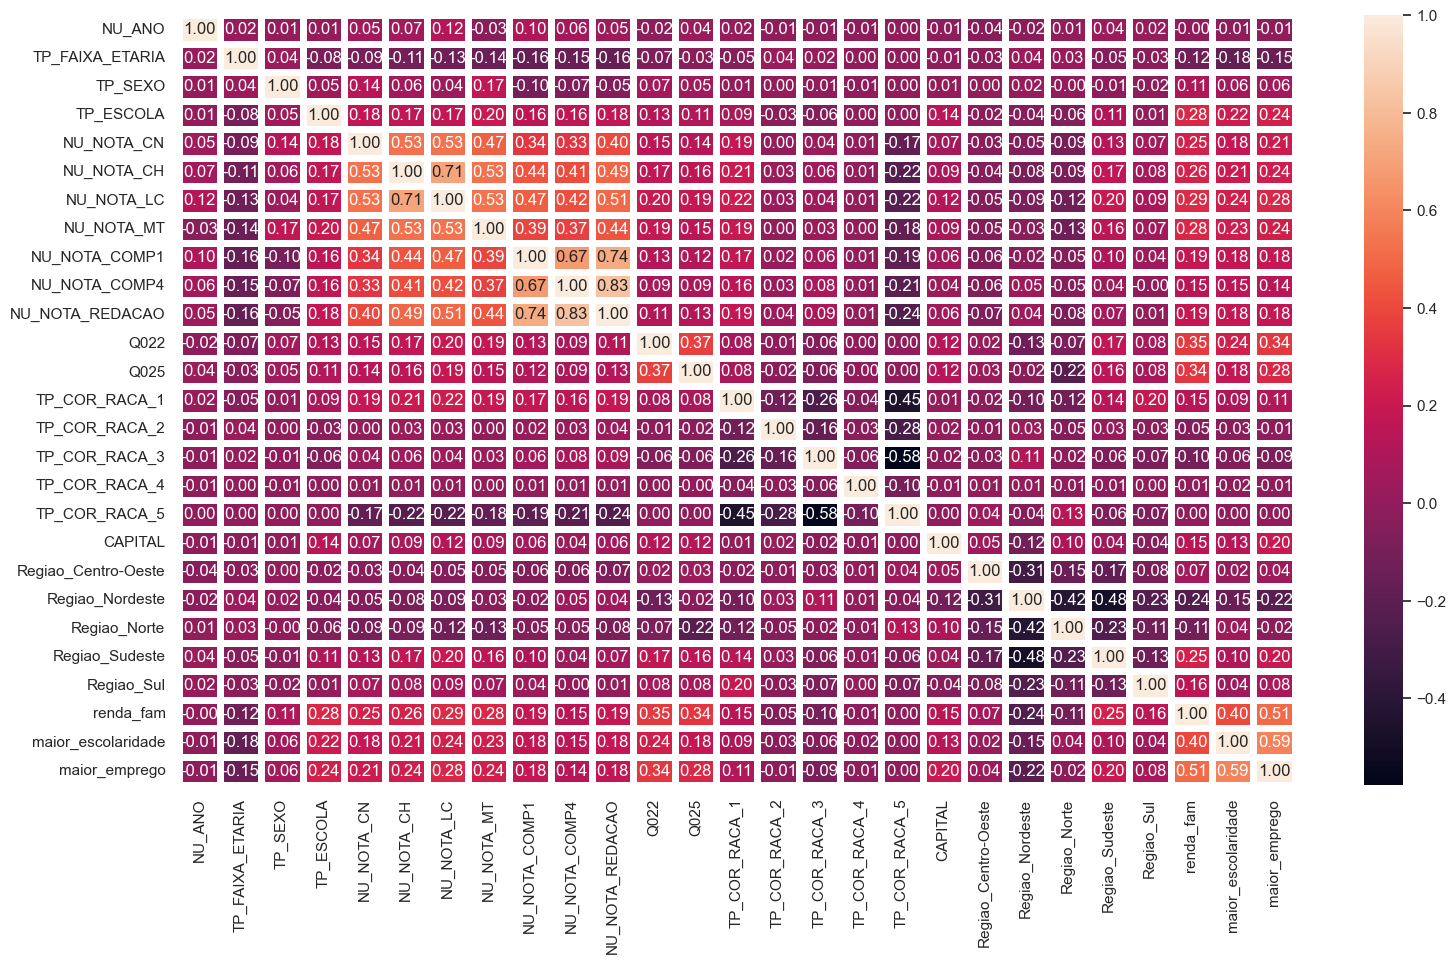

In [49]:
copia = df.copy()
copia = copia.drop('NU_NOTA_COMP3', axis=1)
plt.figure(figsize=(18, 10))
# Plot da matriz de correlação para df22_match
plot2 = sns.heatmap(copia.corr(method='spearman'), annot=True, fmt="0.2f", linewidths=5)
# Exibir o plot2
plt.show()













In [50]:
# Criando a coluna 'tema_relevante'
df['tema_relevante'] = df['NU_ANO'].apply(lambda x: 1 if x == 2022 else 0)

# Atualizando a coluna 'NU_ANO'
df['NU_ANO'] = df['NU_ANO'] - 2021

# Criando a coluna 'tema_relevante_raca_indigena'
df['tema_relevante_raca_indigena'] = df['tema_relevante'] * df['TP_COR_RACA_5']


In [51]:
print(df.columns)

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESCOLA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_REDACAO', 'Q022', 'Q025',
       'TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4',
       'TP_COR_RACA_5', 'CAPITAL', 'Regiao_Centro-Oeste', 'Regiao_Nordeste',
       'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul', 'renda_fam',
       'maior_escolaridade', 'maior_emprego', 'tema_relevante',
       'tema_relevante_raca_indigena'],
      dtype='object')


In [52]:
X = df[['NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', "NU_NOTA_COMP4", 
       'TP_COR_RACA_2','TP_COR_RACA_3','TP_COR_RACA_4','TP_COR_RACA_5',
       'tema_relevante_raca_indigena']].copy()

Y = df['NU_NOTA_REDACAO'].copy()

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

reg = LinearRegression()
# Treinando o modelo
model1 =  reg.fit(X_train, y_train)
# Prevendo os dados de saída com o modelo treinado 
y_pred = model1.predict(X_test)
# Aqui plotamos os coeficientes da nossa regressão
reg.coef_

array([  0.05858796,   0.09149287,   0.105231  ,   0.07711797,
         1.71736297,   3.02609878,   3.11268098,   2.28361637,
        -4.28510916, -10.52781516,   5.00643757])

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)

# Calculando VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,const,84.358061
1,NU_NOTA_CN,1.711599
2,NU_NOTA_CH,2.252435
3,NU_NOTA_LC,2.279053
4,NU_NOTA_MT,1.806192
5,NU_NOTA_COMP1,2.144225
6,NU_NOTA_COMP4,2.063320
7,TP_COR_RACA_2,1.337899
8,TP_COR_RACA_3,1.907196
9,TP_COR_RACA_4,1.048856


In [54]:
print( mean_squared_error(y_test, y_pred) )
print( mean_absolute_error(y_test, y_pred) )

5553.097173321906
55.92331059092995


In [55]:
df_saida = pd.DataFrame()
df_saida['y'] = y_test
df_saida['y_pred'] = y_pred

# Visualizando os dados previstos vs dados reais.
df_saida.head(100)

,y,y_pred
2862,580.0,665.375805
6369,640.0,606.633531
5010,380.0,503.305542
8356,820.0,845.152392
4849,840.0,846.540379
...,...,...
3214,580.0,631.986196
1692,700.0,700.692269
4475,580.0,569.838617
2972,540.0,573.836555


In [89]:
# Importando Statsmodels para ter uma visão visão mais geral dos indicadores do modelo.
import statsmodels.api as sm

# Aqui estamos usando os mesmos dados anteriore de treino e teste. 
# O modelo resultante é exatamente o mesmo.
X_train=sm.add_constant(X_train)
m1 = sm.OLS( y_train, X_train)
m1 = m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     6696.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:37:28   Log-Likelihood:            -1.0907e+05
No. Observations:               19083   AIC:                         2.182e+05
Df Residuals:                   19071   BIC:                         2.183e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -144.6757      4.880    -29.644      0.000    -154.242    -135.110
NU_NOTA_CN                       0.0586      0.010      5.740      0.000       0.039       0.079
NU_NOTA_CH                       0.0915      0.010      9.020      0.000       0.072       0.111
NU_NOTA_LC                       0.1052      0.011      9.467      0.000       0.083       0.127
NU_NOTA_MT                       0.0771      0.007     10.956      0.000       0.063       0.091
NU_NOTA_COMP1                    1.7174      0.031     56.215      0.000       1.657       1.777
NU_NOTA_COMP4                    3.0261      0.024    123.841      0.000       2.978       3.074
TP_COR_RACA_2                    3.1127      2.411      1.291      0.197      -1.614       7.839
TP_COR_RACA_3                    2.2836      1.695      1.348      0.178      -1.038       5.605
TP_COR_RACA_4                   -4.2851      5.621     -0.762      0.446     -15.303       6.732
TP_COR_RACA_5                  -10.5278      1.661     -6.337      0.000     -13.784      -7.271
tema_relevante_raca_indigena     5.0064      1.600      3.128      0.002       1.870       8.143
==============================================================================
Omnibus:                     2911.916   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6284.392
Skew:                          -0.910   Prob(JB):                         0.00
Kurtosis:                       5.142   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
confidence_intervals = m1.conf_int()
print(confidence_intervals)

                                       0           1
const                        -154.241923 -135.109577
NU_NOTA_CN                      0.038580    0.078596
NU_NOTA_CH                      0.071611    0.111375
NU_NOTA_LC                      0.083444    0.127018
NU_NOTA_MT                      0.063321    0.090915
NU_NOTA_COMP1                   1.657482    1.777244
NU_NOTA_COMP4                   2.978203    3.073994
TP_COR_RACA_2                  -1.614032    7.839394
TP_COR_RACA_3                  -1.037964    5.605197
TP_COR_RACA_4                 -15.302599    6.732381
TP_COR_RACA_5                 -13.784208   -7.271422
tema_relevante_raca_indigena    1.869633    8.143242


In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, r2_score

# Suponha que 'df' seja o DataFrame com os dados
# df = pd.read_csv('seus_dados.csv')

# Criar uma variável categórica para raça
def map_race(row):
    if row['TP_COR_RACA_1'] == 1:
        return 'Raça_1'
    elif row['TP_COR_RACA_2'] == 1:
        return 'Raça_2'
    elif row['TP_COR_RACA_3'] == 1:
        return 'Raça_3'
    elif row['TP_COR_RACA_4'] == 1:
        return 'Raça_4'
    elif row['TP_COR_RACA_5'] == 1:
        return 'Raça_5'
    else:
        return 'Raça_0'

df['Raca'] = df.apply(map_race, axis=1)

# Definindo a fórmula do modelo
formula = 'NU_NOTA_REDACAO ~NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_LC +\
      NU_NOTA_MT + NU_NOTA_COMP1 + NU_NOTA_COMP4 + tema_relevante_raca_indigena'

# Ajustando o modelo multinível
model = smf.mixedlm(formula, df, groups=df['TP_COR_RACA_5'])
result = model.fit()

# Exibir o resumo do modelo
print(result.summary())

# Previsões do modelo
predictions = result.predict(df)

# Calcular o erro absoluto médio (MAE)
mae = mean_absolute_error(df['NU_NOTA_REDACAO'], predictions)

# Calcular o coeficiente de determinação (R^2)
r2 = r2_score(df['NU_NOTA_REDACAO'], predictions)

print(f'MAE: {mae}')
print(f'R^2: {r2}')
LL = result.llf
k = result.df_modelwc + 1  # +1 para contar o intercepto
AIC = -2 * LL + 2 * k
print(f'AIC: {AIC}')

                    Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      NU_NOTA_REDACAO
No. Observations:        23854        Method:                  REML           
No. Groups:              2            Scale:                   5430.1131      
Min. group size:         11927        Log-Likelihood:          -136434.9682   
Max. group size:         11927        Converged:               Yes            
Mean group size:         11927.0                                              
------------------------------------------------------------------------------
                              Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                    -149.073    7.117 -20.945 0.000 -163.023 -135.123
NU_NOTA_CN                      0.060    0.009   6.573 0.000    0.042    0.078
NU_NOTA_CH                      0.100    0.009  10.976 0.000    0.082    

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, r2_score

# Suponha que 'df' seja o DataFrame com os dados
# df = pd.read_csv('seus_dados.csv')

# Criar uma variável categórica para raça
def map_race(row):
    if row['TP_COR_RACA_1'] == 1:
        return 'Raça_1'
    elif row['TP_COR_RACA_2'] == 1:
        return 'Raça_2'
    elif row['TP_COR_RACA_3'] == 1:
        return 'Raça_3'
    elif row['TP_COR_RACA_4'] == 1:
        return 'Raça_4'
    elif row['TP_COR_RACA_5'] == 1:
        return 'Raça_5'
    else:
        return 'Raça_0'

df['Raca'] = df.apply(map_race, axis=1)

# Definindo a fórmula do modelo
formula = 'NU_NOTA_REDACAO ~NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_LC +\
      NU_NOTA_MT + NU_NOTA_COMP1 + NU_NOTA_COMP4 + tema_relevante_raca_indigena'

# Ajustando o modelo multinível
model = smf.mixedlm(formula, df, groups=df['Raca'])
result = model.fit()

# Exibir o resumo do modelo
print(result.summary())

# Previsões do modelo
predictions = result.predict(df)

# Calcular o erro absoluto médio (MAE)
mae = mean_absolute_error(df['NU_NOTA_REDACAO'], predictions)

# Calcular o coeficiente de determinação (R^2)
r2 = r2_score(df['NU_NOTA_REDACAO'], predictions)

print(f'MAE: {mae}')
print(f'R^2: {r2}')
LL = result.llf
k = result.df_modelwc + 1  # +1 para contar o intercepto
AIC = -2 * LL + 2 * k
print(f'AIC: {AIC}')

                    Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      NU_NOTA_REDACAO
No. Observations:        23854        Method:                  REML           
No. Groups:              5            Scale:                   5429.9467      
Min. group size:         228          Log-Likelihood:          -136437.4496   
Max. group size:         11927        Converged:               Yes            
Mean group size:         4770.8                                               
------------------------------------------------------------------------------
                              Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                    -147.133    4.814 -30.566 0.000 -156.567 -137.698
NU_NOTA_CN                      0.061    0.009   6.639 0.000    0.043    0.078
NU_NOTA_CH                      0.100    0.009  10.994 0.000    0.082    

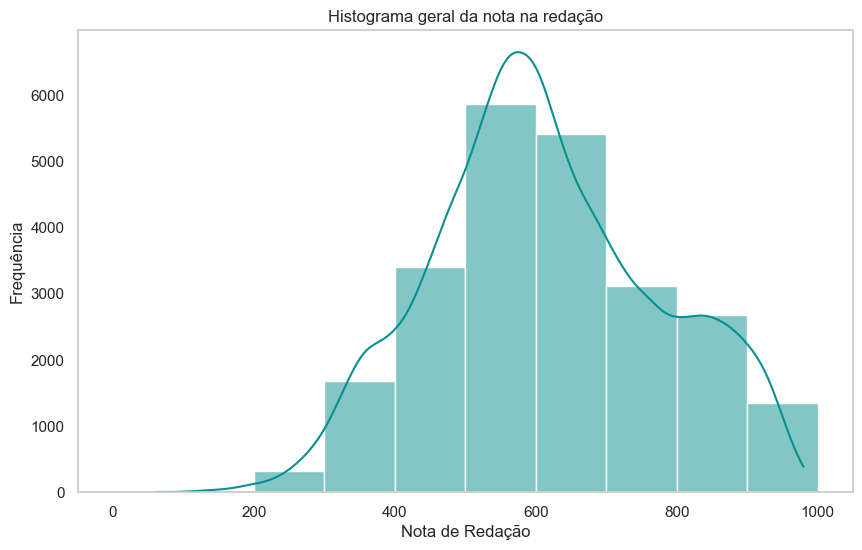

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def nota_grupo(dados_grupo, info, nota):
    # Definir os limites dos bins manualmente
    bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(dados_grupo[nota], bins=bins, kde=True, color= '#088F8F')
    plt.title(info)
    plt.xlabel('Nota de Redação')
    plt.ylabel('Frequência')
    plt.grid(False)
    plt.show()

# Exemplo de uso da função
nota_grupo(df, 'Histograma geral da nota na redação', 'NU_NOTA_REDACAO')


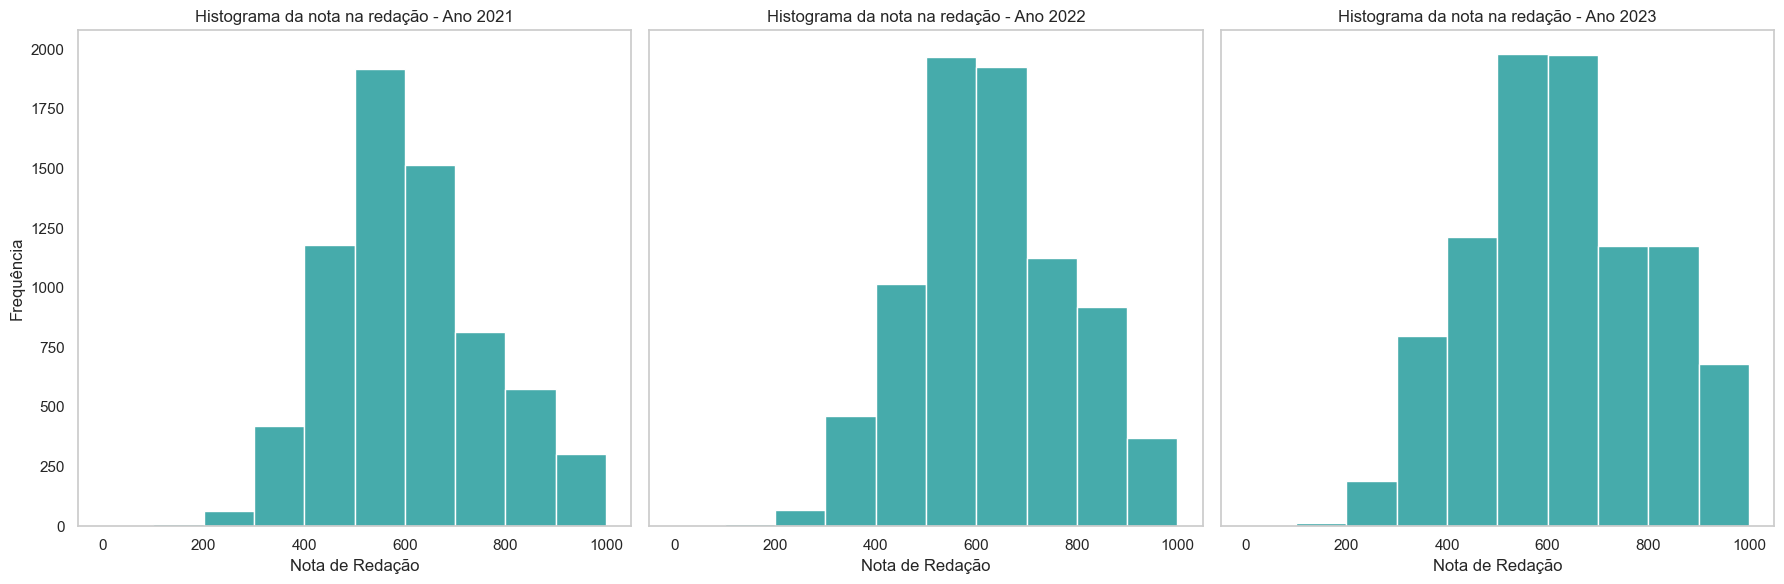

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def nota_grupo(dados_grupo, info, nota, anos):
    # Definir os limites dos bins manualmente
    bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for i, ano in enumerate(anos):
        sns.histplot(dados_grupo[dados_grupo['NU_ANO'] == ano][nota], bins=bins, kde=False, ax=axs[i], color= '#088F8F')
        axs[i].set_title(f'{info} {ano+2021}')
        axs[i].set_xlabel('Nota de Redação')
        axs[i].set_ylabel('Frequência')
        axs[i].grid(False)  # Remover as linhas de grade

    plt.tight_layout()
    plt.show()

# Exemplo de uso da função
anos = [0, 1, 2]  # Substitua pelos anos que você deseja analisar
nota_grupo(df, 'Histograma da nota na redação - Ano', 'NU_NOTA_REDACAO', anos)


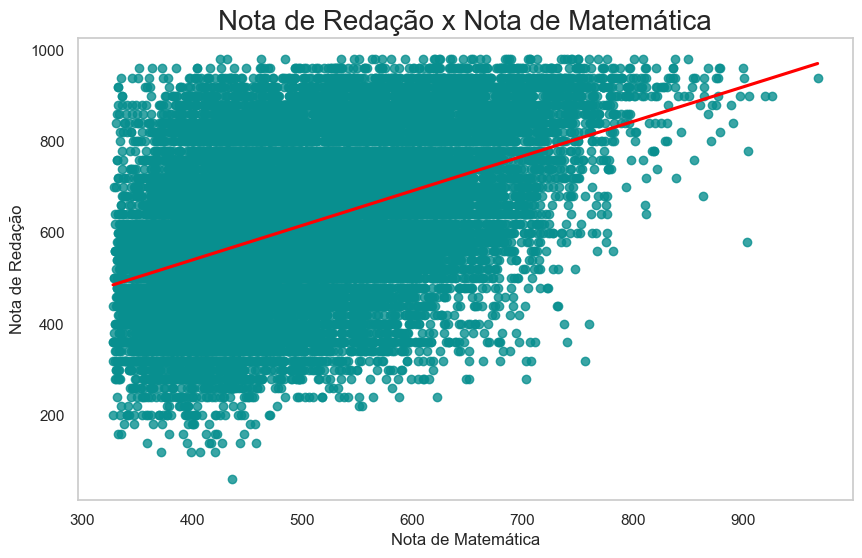

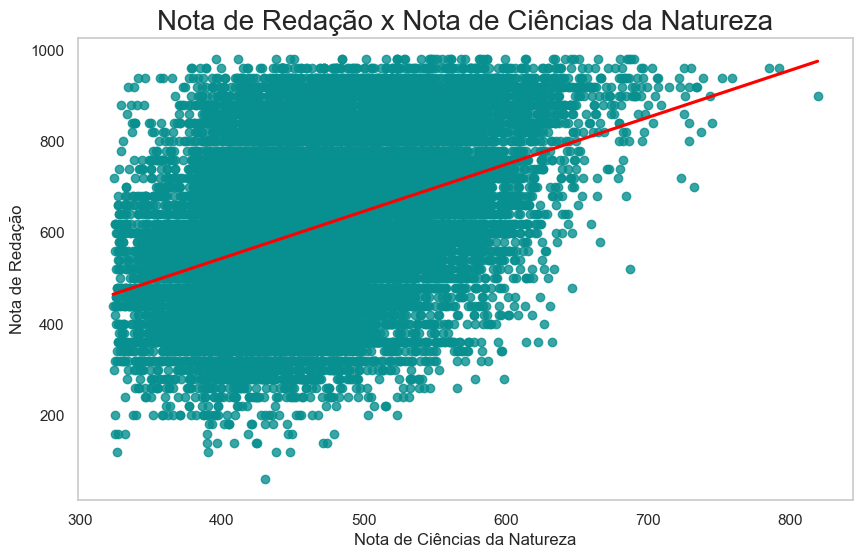

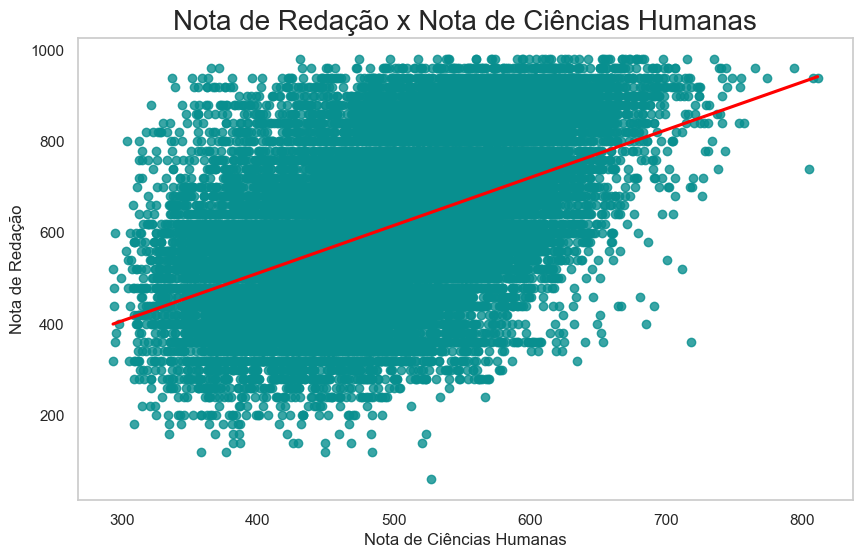

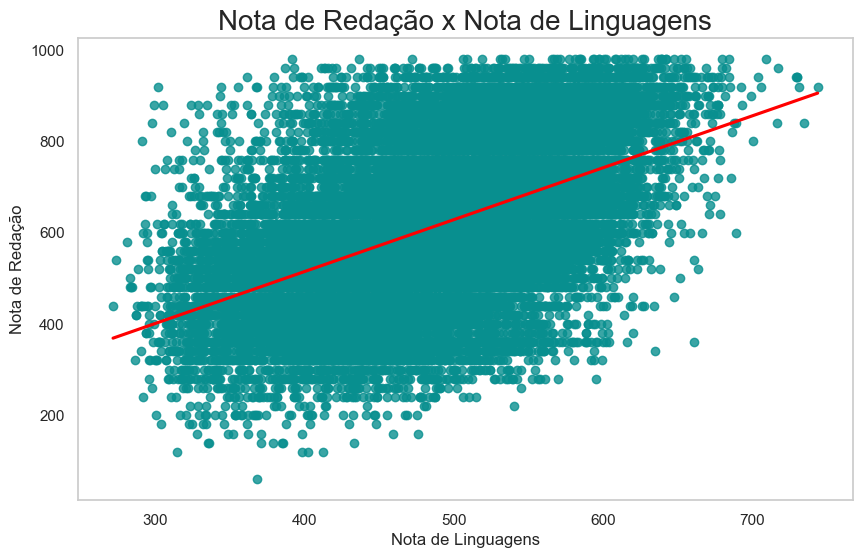

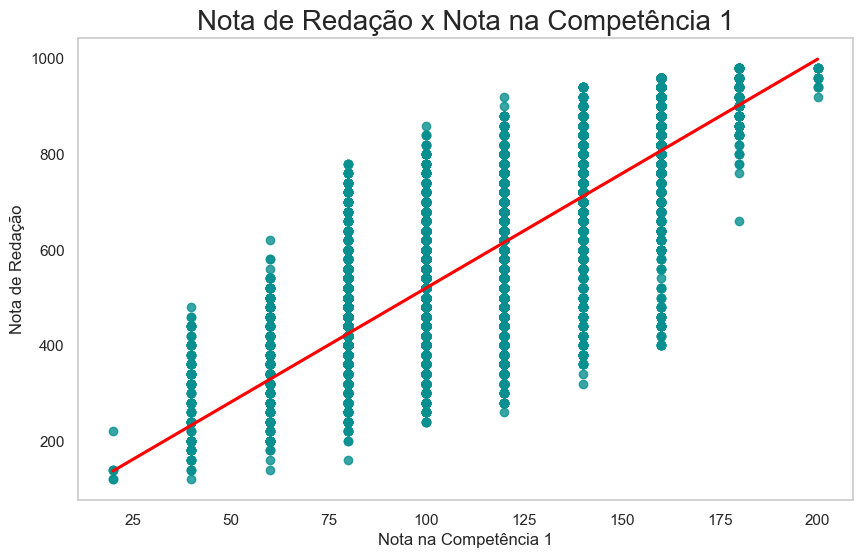

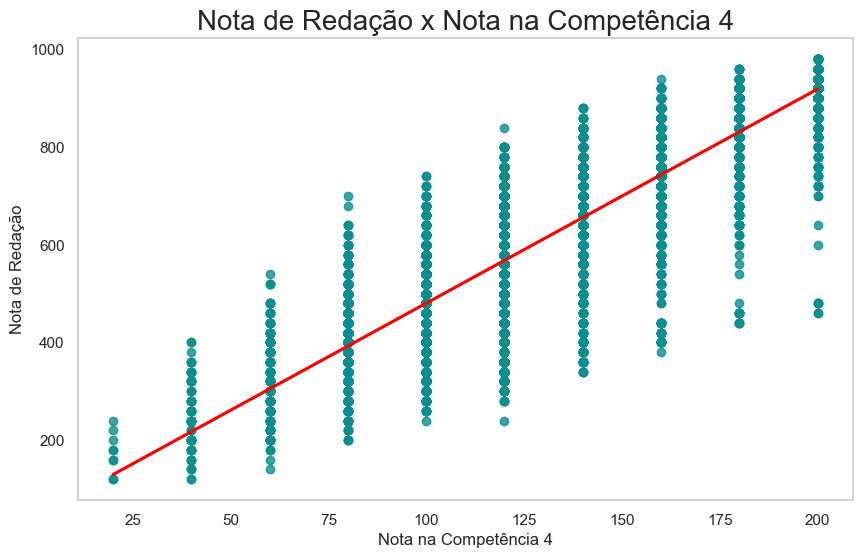

In [65]:
copia = df[df['NU_NOTA_MT']!=0].copy()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='NU_NOTA_MT', y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')

# Adicionando título e rótulos aos eixos
plt.title('Nota de Redação x Nota de Matemática', fontsize= 20)
plt.xlabel('Nota de Matemática')
plt.ylabel('Nota de Redação')
plt.grid(False)

# Exibindo o gráfico
plt.show()

################################################################

copia = df[df['NU_NOTA_CN']!=0].copy()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='NU_NOTA_CN', y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')

# Adicionando título e rótulos aos eixos
plt.title('Nota de Redação x Nota de Ciências da Natureza', fontsize= 20)
plt.xlabel('Nota de Ciências da Natureza')
plt.ylabel('Nota de Redação')
plt.grid(False)

# Exibindo o gráfico
plt.show()

################################################################

copia = df[df['NU_NOTA_CH']!=0].copy()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='NU_NOTA_CH', y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')

# Adicionando título e rótulos aos eixos
plt.title('Nota de Redação x Nota de Ciências Humanas', fontsize= 20)
plt.xlabel('Nota de Ciências Humanas')
plt.ylabel('Nota de Redação')
plt.grid(False)

# Exibindo o gráfico
plt.show()

################################################################

copia = df[df['NU_NOTA_LC']!=0].copy()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='NU_NOTA_LC', y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')

# Adicionando título e rótulos aos eixos
plt.title('Nota de Redação x Nota de Linguagens', fontsize= 20)
plt.xlabel('Nota de Linguagens')
plt.ylabel('Nota de Redação')
plt.grid(False)

# Exibindo o gráfico
plt.show()

################################################################

copia = df[df['NU_NOTA_COMP1']!=0].copy()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='NU_NOTA_COMP1', y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')

# Adicionando título e rótulos aos eixos
plt.title('Nota de Redação x Nota na Competência 1', fontsize= 20)
plt.xlabel('Nota na Competência 1')
plt.ylabel('Nota de Redação')
plt.grid(False)

# Exibindo o gráfico
plt.show()

################################################################

copia = df[df['NU_NOTA_COMP4']!=0].copy()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='NU_NOTA_COMP4', y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')

# Adicionando título e rótulos aos eixos
plt.title('Nota de Redação x Nota na Competência 4', fontsize= 20)
plt.xlabel('Nota na Competência 4')
plt.ylabel('Nota de Redação')
plt.grid(False)

# Exibindo o gráfico
plt.show()



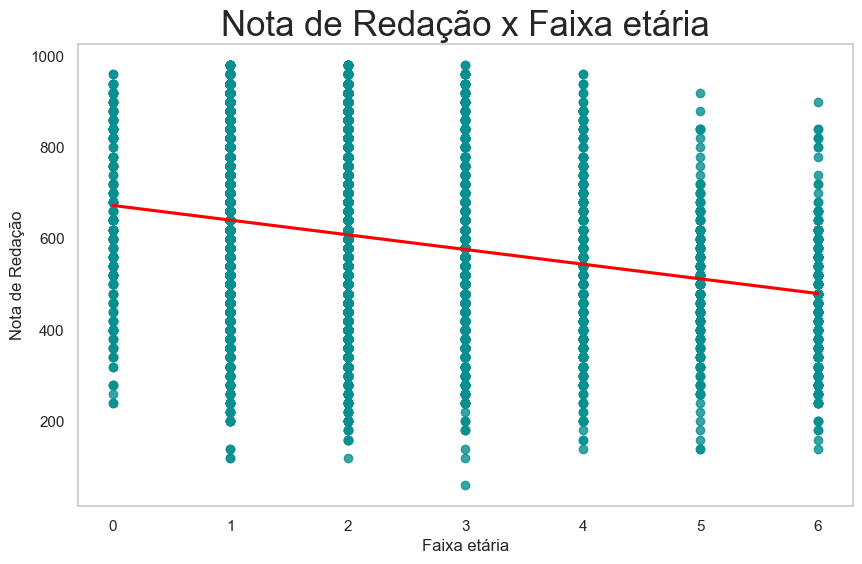

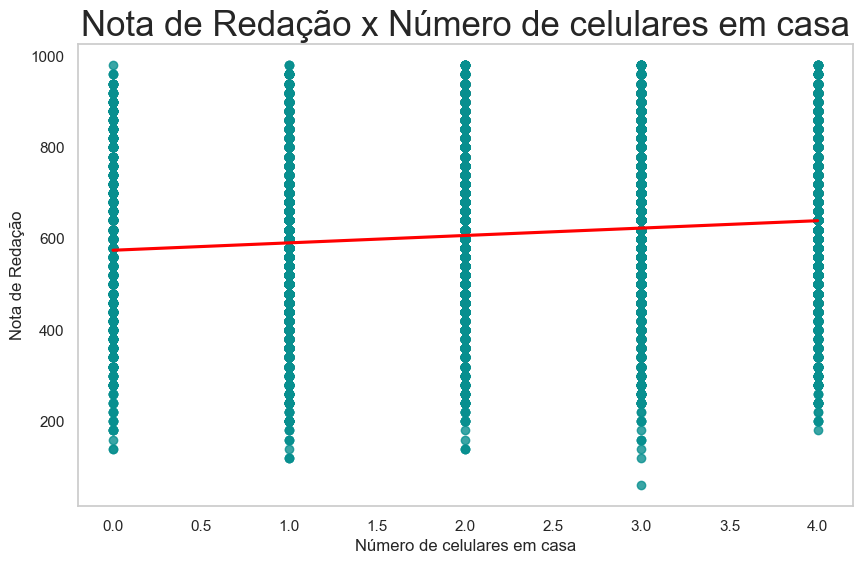

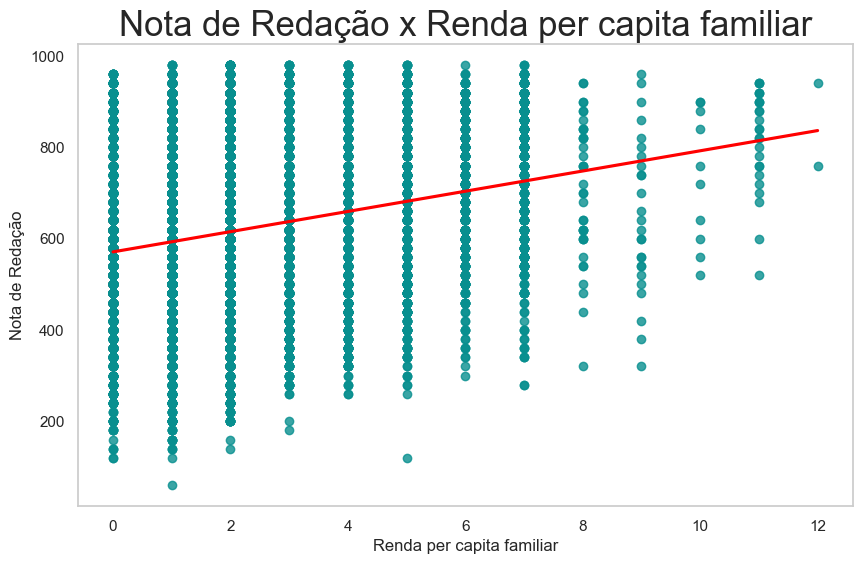

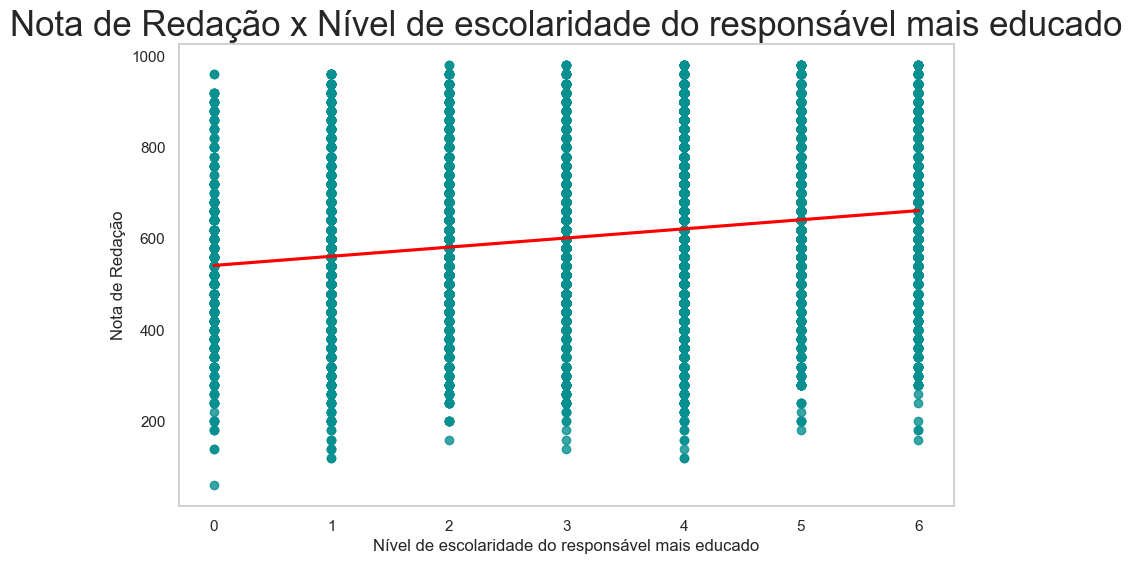

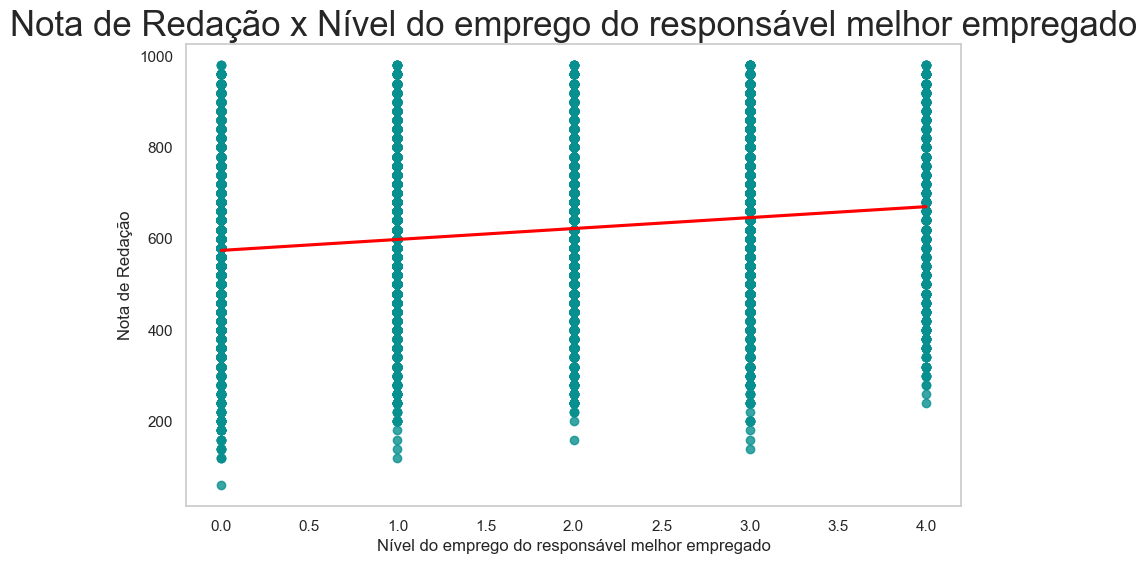

In [84]:
copia = df.copy()

# Lista de variáveis de interesse para o eixo x
variaveis = ['TP_FAIXA_ETARIA', 'Q022',
            'renda_fam', 'maior_escolaridade', 'maior_emprego']
variaveis_nomes = ['Faixa etária', 'Número de celulares em casa',
                    'Renda per capita familiar', 'Nível de escolaridade do responsável mais educado','Nível do emprego do responsável melhor empregado']

# Loop para criar e exibir cada gráfico separadamente
for i, variavel in enumerate(variaveis):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=variavel, y='NU_NOTA_REDACAO', data=copia, ci=None, line_kws={"color":"red"}, color='#088F8F')
    plt.title(f'Nota de Redação x {variaveis_nomes[i]}', fontsize = 25)
    plt.xlabel(variaveis_nomes[i])
    plt.ylabel('Nota de Redação')
    plt.grid(False)
    plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


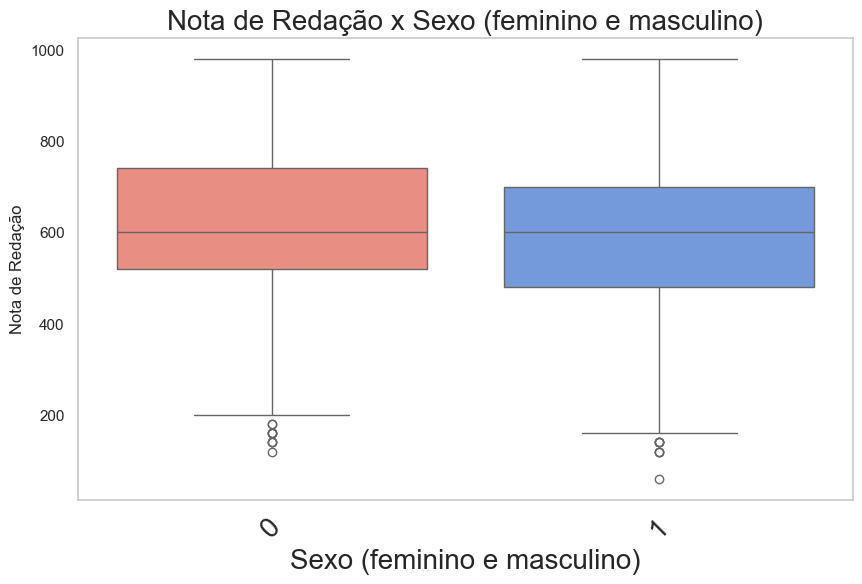

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


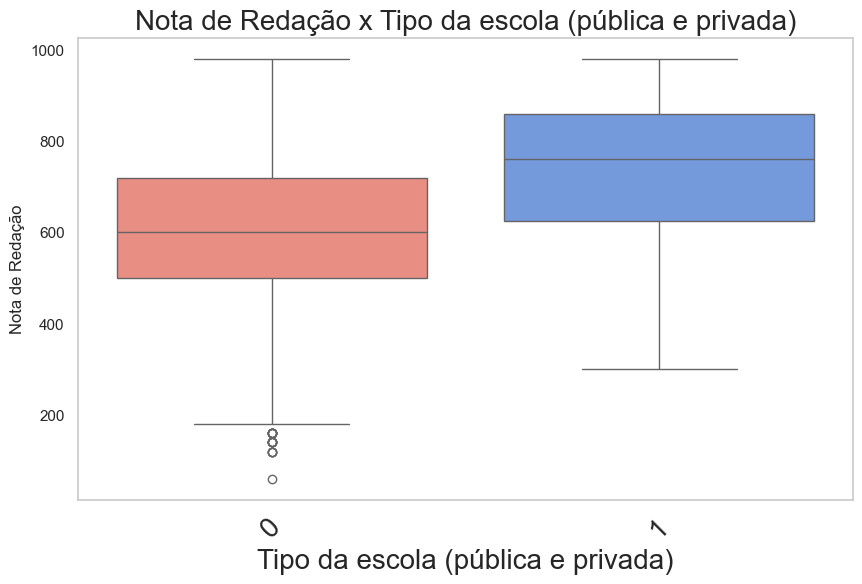

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])
C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


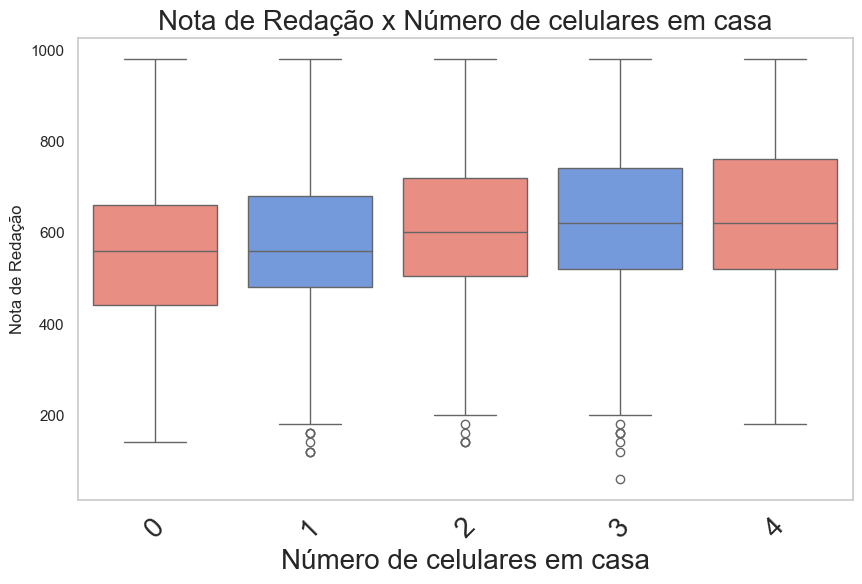

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


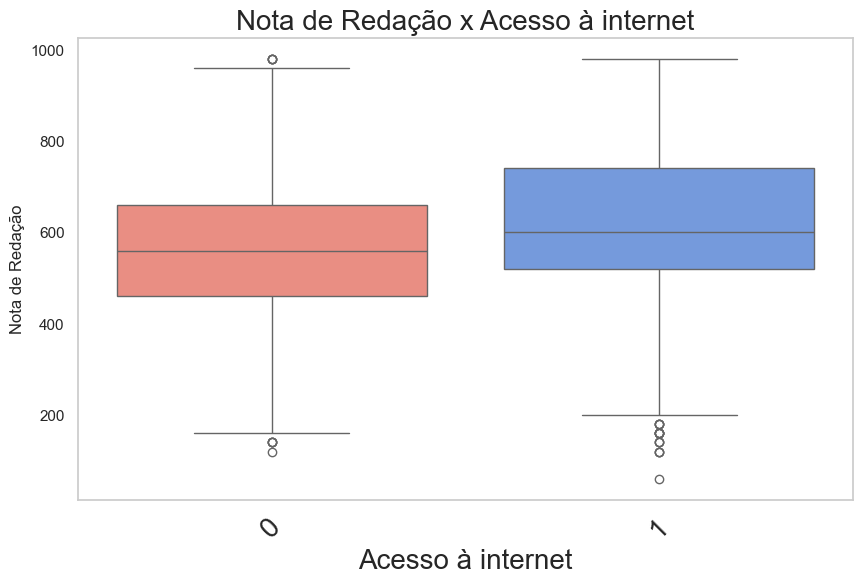

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


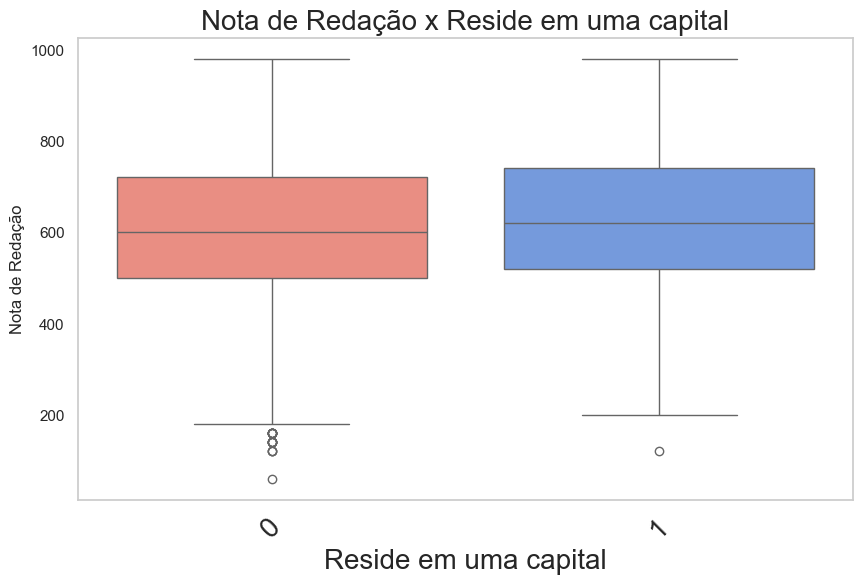

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


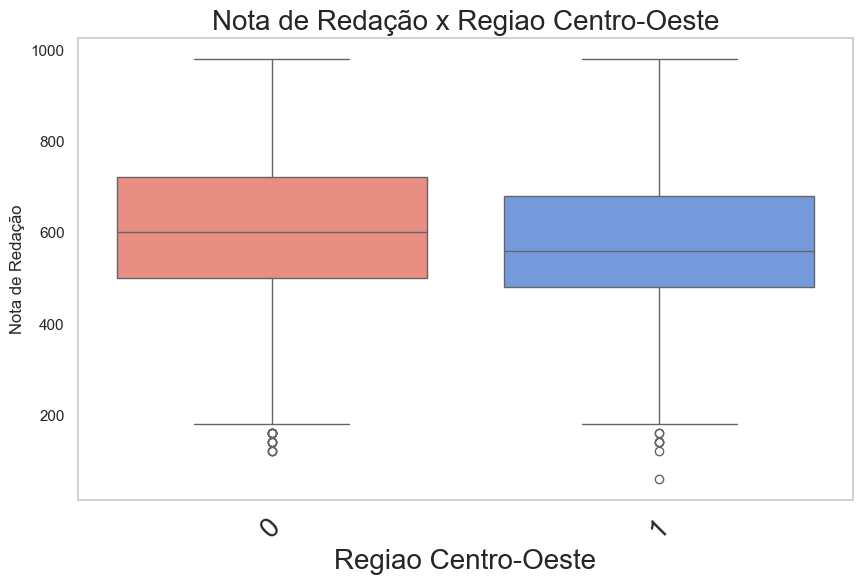

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


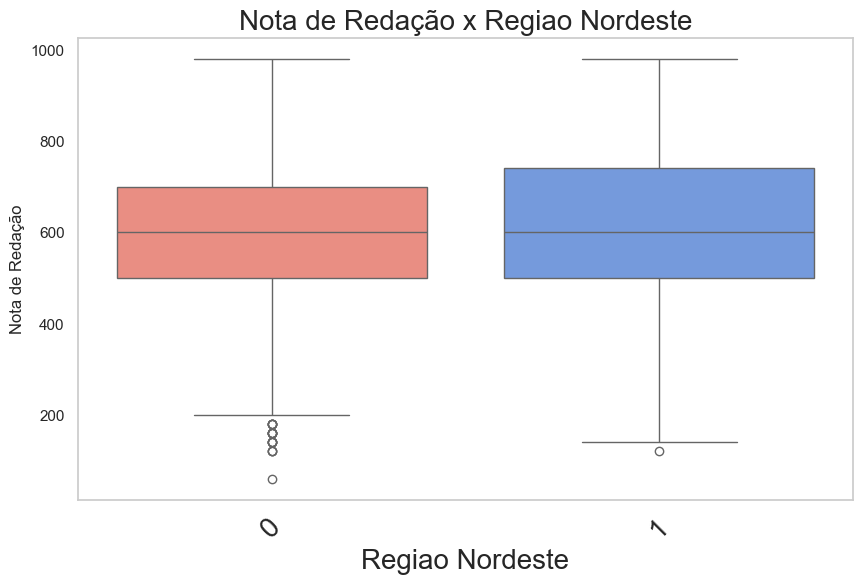

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


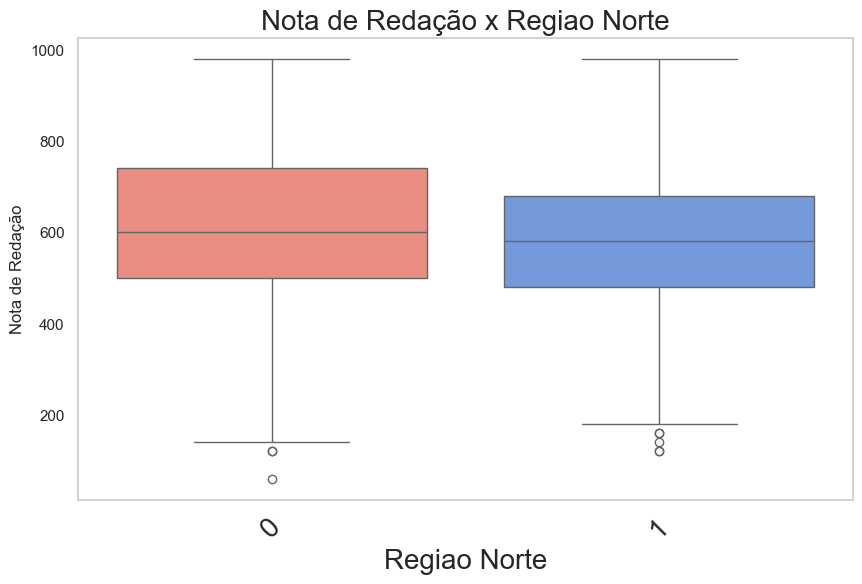

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


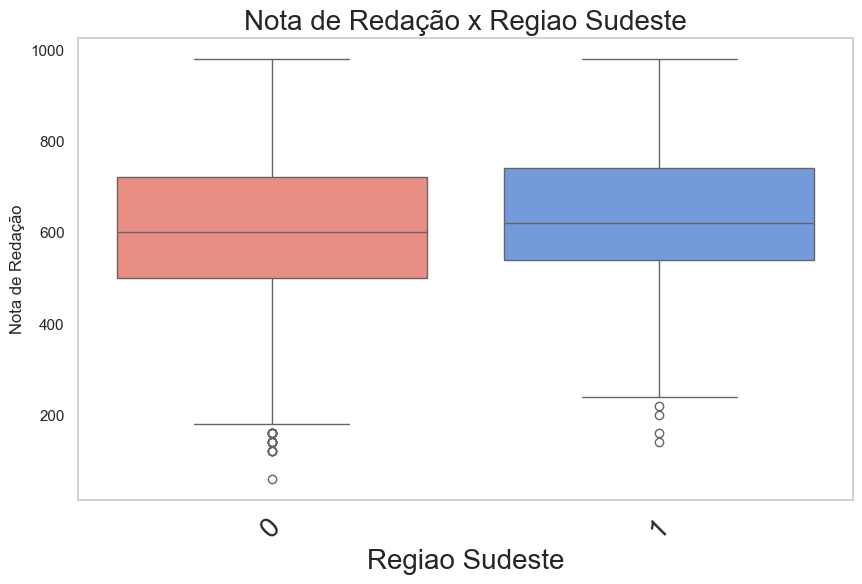

C:\Users\rafae\AppData\Local\Temp\ipykernel_13836\2125619437.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])


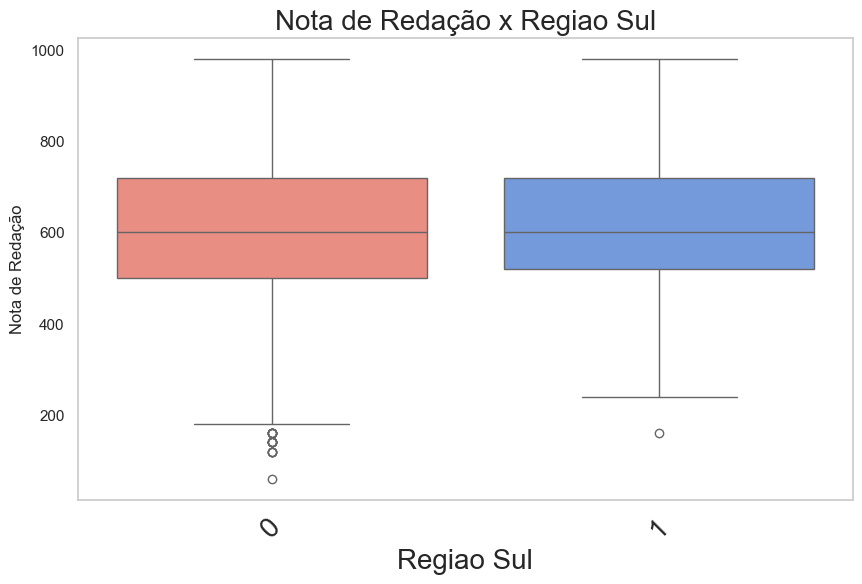

In [83]:
copia = df.copy()

# Lista de variáveis de interesse para o eixo x
variaveis = ['TP_SEXO', 'TP_ESCOLA', 'Q022', 'Q025', 'CAPITAL', 
             'Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul',]
variaveis_nomes = ['Sexo (feminino e masculino)', 'Tipo da escola (pública e privada)',
                    'Número de celulares em casa', 'Acesso à internet', 'Reside em uma capital',
                    'Regiao Centro-Oeste', 'Regiao Nordeste', 'Regiao Norte', 'Regiao Sudeste', 'Regiao Sul']

# Loop para criar e exibir cada gráfico separadamente
for i, variavel in enumerate(variaveis):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=copia, x=variavel, y='NU_NOTA_REDACAO', palette=['salmon', 'cornflowerblue'])
    plt.title(f'Nota de Redação x {variaveis_nomes[i]}', fontsize = 20)
    plt.xlabel(variaveis_nomes[i],fontsize = 20)
    plt.ylabel('Nota de Redação')
    plt.xticks(rotation=45, fontsize = 20)  # Rotação dos rótulos se necessário
    plt.grid(False)
    plt.show()